## 1. IMPORTAR LIBRERÍAS
### Importamos las librerías necesarias para la manipulación de datos y visualización.

In [1330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 2. CARGAR LOS DATOS
### Cargamos el dataset proporcionado por el usuario.

In [1331]:
file_path = 'FastFoodNutritionMenuV2.csv'
data = pd.read_csv(file_path)


## 3. DATAFRAME HEAD
### Mostramos las primeras 5 filas del dataset para visualizar su estructura inicial.

In [1332]:
print("Primeras 5 filas del dataset:")
(data.head())

Primeras 5 filas del dataset:


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


## 4. DATAFRAME INFO
### Información general del dataset, incluyendo el número de filas, columnas y tipos de datos.

In [1333]:
print("\nInformación general del dataset:")
(data.info())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


## 5. DATAFRAME DESCRIBE
### Estadísticas descriptivas básicas para las columnas numéricas.

In [1334]:
print("\nEstadísticas descriptivas:")
(data.describe())


Estadísticas descriptivas:


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1148,1148,1147,642,1091,1091,1091,1147,1147,1091,1091,1147,1091,887
unique,6,1072,105,64,73,35,11,65,214,131,17,122,56,524
top,McDonald’s,20 fl oz,0,0,0,0,0,0,0,0,0,0,0,0
freq,329,11,83,175,357,383,954,378,54,75,551,190,314,67


## 6. LIMPIEZA DE DATOS
### Identificación y manejo de valores faltantes

In [1335]:
# Verificar valores nulos en cada columna
(data.isnull().sum())

# Opcional: Mostrar porcentaje de valores faltantes
missing_percentage = data.isnull().mean() * 100
(missing_percentage)


Company                   0.000000
Item                      0.000000
Calories                  0.087108
Calories from\nFat       44.076655
Total Fat\n(g)            4.965157
Saturated Fat\n(g)        4.965157
Trans Fat\n(g)            4.965157
Cholesterol\n(mg)         0.087108
Sodium \n(mg)             0.087108
Carbs\n(g)                4.965157
Fiber\n(g)                4.965157
Sugars\n(g)               0.087108
Protein\n(g)              4.965157
Weight Watchers\nPnts    22.735192
dtype: float64

### Eliminar filas completamente vacías si existen.

In [1336]:
# Eliminar columnas con más del 50% de valores nulos
data = data.loc[:, missing_percentage < 50]


### Eliminación de registros duplicados

In [1337]:
# Verificar y eliminar duplicados
print("Duplicados antes:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicados después:", data.duplicated().sum())


Duplicados antes: 7
Duplicados después: 0


### Tratamiento de datos atípicos (outliers)

In [1338]:
# Listado de columnas que deben ser numéricas
numeric_columns = [
    'Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)', 
    'Trans Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)', 
    'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)', 'Weight Watchers\nPnts'
]

# Limpiar las columnas numéricas eliminando caracteres no numéricos
for col in numeric_columns:
    data[col] = data[col].replace(r'[^0-9.\-]', '', regex=True)  # Eliminar caracteres no numéricos
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convertir a numérico

# Verificar tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
(data.dtypes)

# Mostrar estadísticas descriptivas para columnas numéricas
("\nEstadísticas descriptivas para columnas numéricas:")
(data[numeric_columns].describe())

# Calcular el rango intercuartil (IQR) para la columna 'Calories'
q1 = data['Calories'].quantile(0.25)
q3 = data['Calories'].quantile(0.75)
iqr = q3 - q1

# Mostrar los valores calculados de Q1, Q3 y IQR
(f"\nQ1 (25%): {q1}, Q3 (75%): {q3}, IQR: {iqr}")

# Filtrar outliers fuera de 1.5 * IQR
data_outliers_removed = data[
    (data['Calories'] >= q1 - 1.5 * iqr) & 
    (data['Calories'] <= q3 + 1.5 * iqr)
]

# Mostrar cuántos datos quedaron después de eliminar outliers
(f"\nDatos originales: {len(data)}, Datos después de eliminar outliers: {len(data_outliers_removed)}")

# Manejar valores faltantes (opcional): Rellenar con la media de cada columna

# Verificar valores faltantes después de rellenar
("\nValores faltantes después de limpiar y rellenar:")
(data_outliers_removed.isnull().sum())

# Estadísticas descriptivas finales después del tratamiento de outliers
("\nEstadísticas descriptivas finales:")
(data_outliers_removed[numeric_columns].describe())

# Guardar el dataset limpio si es necesario
# data_outliers_removed.to_csv("dataset_limpio.csv", index=False)


Tipos de datos después de la conversión:


,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1084.000000,591.000000,1030.000000,1030.000000,1030.000000,1084.000000,1084.000000,1030.000000,1030.000000,1084.000000,1030.000000,830.000000
mean,262.523063,100.177665,10.199515,3.553883,0.083495,35.179889,389.721402,36.810680,1.370874,22.932657,8.410680,280.118072
std,182.885143,104.316227,11.220827,4.083228,0.294622,57.047144,443.683588,28.057003,2.181361,29.997908,9.279343,192.873686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.750000,16.000000,0.000000,2.000000,0.000000,137.000000
50%,240.000000,70.000000,8.000000,2.500000,0.000000,15.000000,180.000000,33.000000,0.000000,7.000000,6.000000,266.000000
75%,380.000000,160.000000,16.000000,5.000000,0.000000,45.000000,612.500000,50.750000,2.000000,39.000000,13.000000,397.375000
max,750.000000,470.000000,52.000000,25.000000,2.500000,555.000000,2590.000000,155.000000,15.000000,155.000000,48.000000,845.000000


## Preprocesamiento de Datos

### Normalización y estandarización

In [1339]:

# Seleccionamos las columnas numéricas
numeric_columns = [
    'Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)', 
    'Trans Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)', 
    'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)', 'Weight Watchers\nPnts'
]

# Inicializamos el scaler
scaler = MinMaxScaler()

# Normalizamos las columnas numéricas
data_normalized = data[numeric_columns].copy()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

# Mostramos las primeras filas después de la normalización
("Primeras filas después de la normalización:")
(data_normalized.head())



,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,0.204918,0.106667,0.091837,0.106061,0.111111,0.043478,0.179931,0.114815,0.064516,0.022727,0.169014,0.187927
1,0.245902,0.146667,0.122449,0.181818,0.111111,0.069565,0.259516,0.122222,0.064516,0.022727,0.211268,0.225513
2,0.360656,0.280000,0.234694,0.333333,0.333333,0.139130,0.397924,0.125926,0.064516,0.026515,0.352113,0.328778
3,0.319672,0.226667,0.193878,0.242424,0.222222,0.113043,0.318339,0.122222,0.064516,0.026515,0.309859,0.290812
4,0.418033,0.306667,0.265306,0.363636,0.333333,0.156522,0.411765,0.148148,0.096774,0.034091,0.408451,0.381169


In [1340]:
# Estandarización: Z-score Scaling (Media 0 y desviación estándar 1)
from sklearn.preprocessing import StandardScaler

# Inicializamos el scaler para estandarización
scaler_std = StandardScaler()

# Estandarizamos las columnas numéricas
data_standardized = data[numeric_columns].copy()
data_standardized[numeric_columns] = scaler_std.fit_transform(data_standardized[numeric_columns])

# Mostramos las primeras filas después de la estandarización
("Primeras filas después de la estandarización:")
(data_standardized.head())


,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,-0.170327,-0.287356,-0.193451,-0.114760,0.731745,-0.225247,0.184649,-0.253029,0.229412,-0.552083,0.231912,-0.266062
1,0.054328,-0.060697,0.021042,0.381699,0.731745,-0.004381,0.646761,-0.189963,0.229412,-0.552083,0.502728,-0.059124
2,0.683362,0.694833,0.807518,1.374615,2.769226,0.584596,1.450434,-0.158430,0.229412,-0.521145,1.405450,0.509431
3,0.458707,0.392621,0.521527,0.778865,1.750486,0.363730,0.988322,-0.189963,0.229412,-0.521145,1.134633,0.300404
4,0.997879,0.845939,1.022011,1.573198,2.769226,0.731840,1.530801,0.030768,0.649804,-0.459268,1.766538,0.797890


## 7. DATAFRAME HEAD
### Mostramos nuevamente las primeras 5 filas después de la limpieza.

In [1341]:
print("\nPrimeras 5 filas después de la limpieza:")
(data.head())



Primeras 5 filas después de la limpieza:


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0


## 8. DATAFRAME INFO
### Verificamos la estructura y que no haya valores nulos después de la limpieza.

In [1342]:
print("\nValores nulos después de la limpieza:")
(data.isnull().sum())


Valores nulos después de la limpieza:


Company                    0
Item                       0
Calories                  15
Calories from\nFat       518
Total Fat\n(g)            69
Saturated Fat\n(g)        69
Trans Fat\n(g)            69
Cholesterol\n(mg)         15
Sodium \n(mg)             15
Carbs\n(g)                69
Fiber\n(g)                69
Sugars\n(g)               15
Protein\n(g)              69
Weight Watchers\nPnts    272
dtype: int64

## 9. DATAFRAME DESCRIBE
### Revisamos las estadísticas descriptivas nuevamente.

In [1343]:
print("\nEstadísticas descriptivas después de la limpieza:")
(data.describe())


Estadísticas descriptivas después de la limpieza:


,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1126.000000,623.000000,1072.000000,1072.000000,1072.000000,1126.000000,1126.000000,1072.000000,1072.000000,1126.000000,1072.000000,869.000000
mean,287.908526,118.033708,11.705690,4.077892,0.140858,40.297513,428.097691,39.024254,1.454291,23.844583,9.430970,311.142693
std,222.662374,132.463769,13.992975,5.038020,0.491031,67.944587,497.935892,31.727560,2.379841,32.336643,11.082784,239.340314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,17.000000,0.000000,2.000000,0.000000,142.000000
50%,240.000000,80.000000,8.000000,3.000000,0.000000,20.000000,190.000000,34.000000,0.000000,8.000000,7.000000,274.000000
75%,390.000000,170.000000,18.000000,6.000000,0.000000,50.000000,680.000000,52.000000,2.000000,39.750000,14.000000,432.000000
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000


## 10. EDA (Exploratory Data Analysis)
### Identificar tipo de datos

### verificacion de 'numeric_data' como DataFrame de pandas con las columnas correctas

In [1344]:
numeric_data = pd.DataFrame({ 'Calories': [100, 200, 150, 300, 250], 'Total Fat (g)': [10, 20, 15, 30, 25] })

### Verificar los nombres de las columnas

In [1345]:
(numeric_data.columns)

Index(['Calories', 'Total Fat (g)'], dtype='object')

## Analisis descriptivo

### Cálculo de estadísticas descriptivas: media, mediana, desviación estándar

In [1346]:


# Identificar las columnas que deben ser numéricas (asumiendo que tienes un conjunto fijo de columnas)
numeric_columns = ['Calories', 'Calories from\nFat', 'Total Fat\n(g)', 'Saturated Fat\n(g)', 'Trans Fat\n(g)',
                   'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)', 'Protein\n(g)',
                   'Weight Watchers\nPnts']

# Convertir las columnas numéricas a tipo numérico, forzando a NaN cuando no es posible
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Rellenar los valores nulos con la media de cada columna numérica
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Calcular las estadísticas descriptivas
mean_values = data[numeric_columns].mean()  # Media
median_values = data[numeric_columns].median()  # Mediana
std_values = data[numeric_columns].std()  # Desviación estándar

# Mostrar las estadísticas descriptivas
print("Media:")
print(mean_values)



Media:
Calories                 287.908526
Calories from\nFat       118.033708
Total Fat\n(g)            11.705690
Saturated Fat\n(g)         4.077892
Trans Fat\n(g)             0.140858
Cholesterol\n(mg)         40.297513
Sodium \n(mg)            428.097691
Carbs\n(g)                39.024254
Fiber\n(g)                 1.454291
Sugars\n(g)               23.844583
Protein\n(g)               9.430970
Weight Watchers\nPnts    311.142693
dtype: float64


In [1347]:
print("\nMediana:")
(median_values)


Mediana:


Calories                 250.000000
Calories from\nFat       118.033708
Total Fat\n(g)             9.000000
Saturated Fat\n(g)         3.000000
Trans Fat\n(g)             0.000000
Cholesterol\n(mg)         20.000000
Sodium \n(mg)            190.000000
Carbs\n(g)                36.000000
Fiber\n(g)                 1.000000
Sugars\n(g)                8.000000
Protein\n(g)               7.000000
Weight Watchers\nPnts    311.142693
dtype: float64

In [1348]:
print("\nDesviación estándar:")
(std_values)


Desviación estándar:


Calories                 221.192640
Calories from\nFat        97.845278
Total Fat\n(g)            13.562894
Saturated Fat\n(g)         4.883174
Trans Fat\n(g)             0.475939
Cholesterol\n(mg)         67.496103
Sodium \n(mg)            494.649150
Carbs\n(g)                30.752398
Fiber\n(g)                 2.306695
Sugars\n(g)               32.123198
Protein\n(g)              10.742149
Weight Watchers\nPnts    208.844621
dtype: float64

### Gráfico de dispersión entre calorias y grasa total

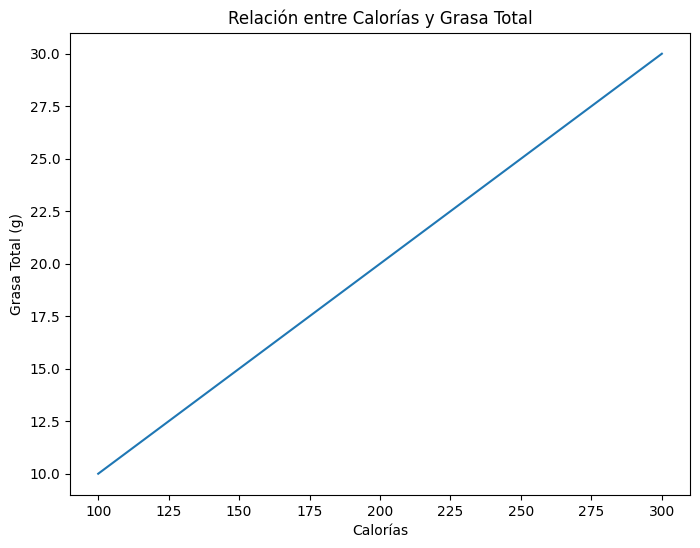

In [1349]:
# Gráfico de líneas entre 'Calories' y 'Total Fat (g)'
plt.figure(figsize=(8, 6))
sns.lineplot(x='Calories', y='Total Fat (g)', data=numeric_data)
plt.title("Relación entre Calorías y Grasa Total")
plt.xlabel("Calorías")
plt.ylabel("Grasa Total (g)")
plt.show()

### Grafico promedio de calorias por compañia

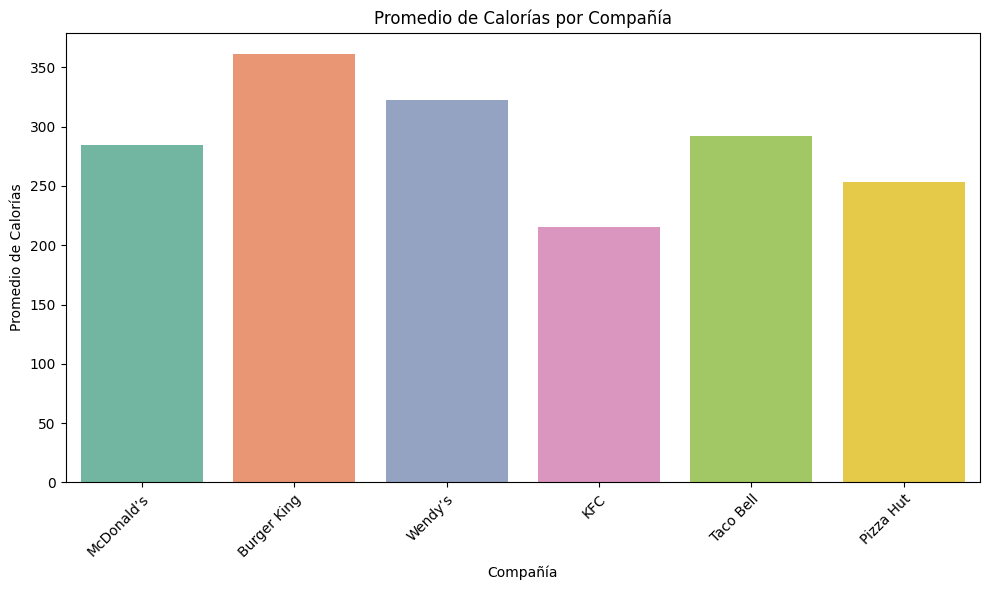

In [1350]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='Company', y='Calories', errorbar=None, hue='Company', palette='Set2')

plt.title("Promedio de Calorías por Compañía")
plt.xlabel("Compañía")
plt.ylabel("Promedio de Calorías")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()  # Ajustar el gráfico para que no se solapen los elementos
plt.show()


### Coleresterol en productos

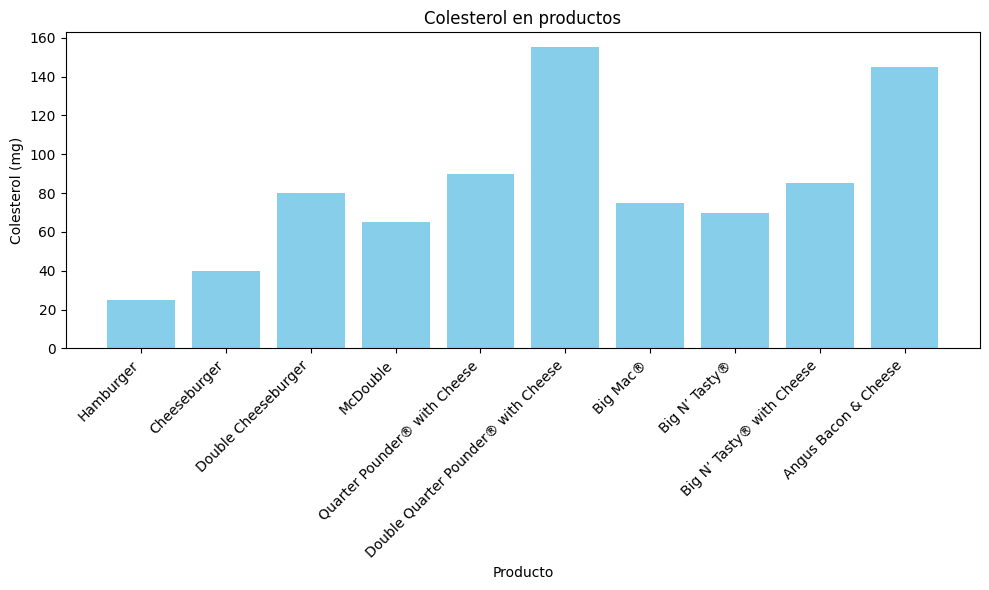

In [1351]:
# Limpiar los nombres de las columnas para evitar saltos de línea u otros caracteres
data.columns = data.columns.str.replace('\n', ' ', regex=False)

# Asegurarse de que la columna 'Cholesterol (mg)' sea numérica
data['Cholesterol (mg)'] = pd.to_numeric(data['Cholesterol (mg)'], errors='coerce')

# Eliminar filas con NaN en la columna de colesterol
data = data.dropna(subset=['Cholesterol (mg)'])

# Seleccionar los primeros 10 productos y sus valores de colesterol
top_10_products = data.head(10)

# Crear el gráfico de barras con los primeros 10 productos
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Item'], top_10_products['Cholesterol (mg)'], color='skyblue')

# Etiquetas y título
plt.xlabel('Producto')
plt.ylabel('Colesterol (mg)')
plt.title('Colesterol en productos')

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Productos mas consumidos

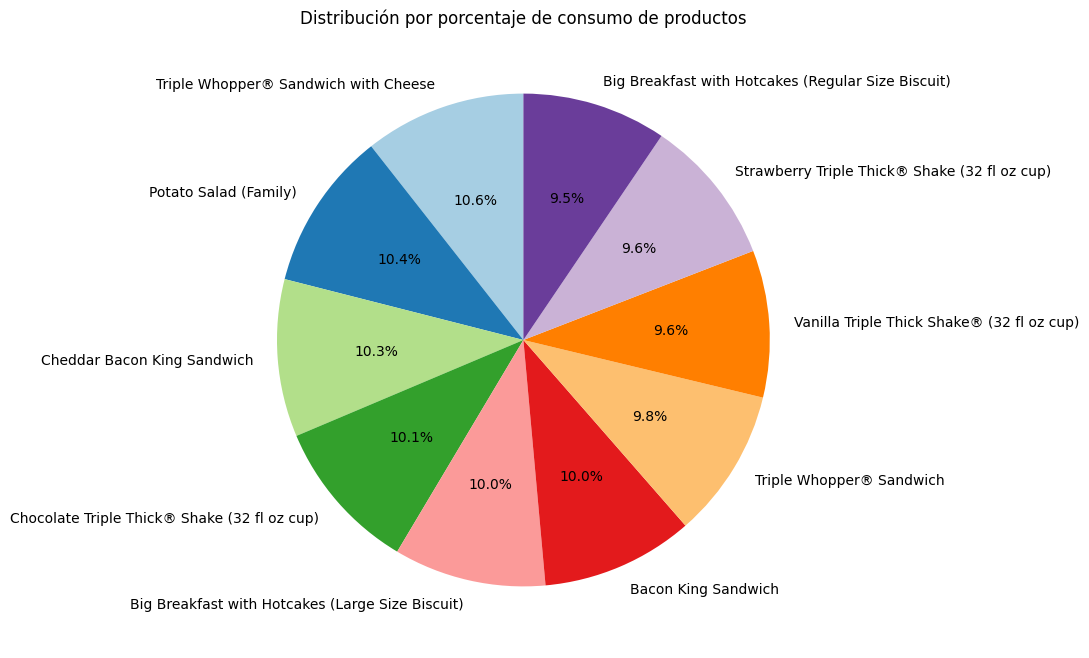

In [1352]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.replace('\n', ' ', regex=False)

# Asegurarse de que las calorías sean numéricas
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')

# Eliminar filas con NaN en la columna de calorías
data = data.dropna(subset=['Calories'])

# Calcular el total de calorías para el cálculo del porcentaje
total_calories = data['Calories'].sum()

# Calcular el porcentaje de consumo de calorías para cada producto
data['Percentage'] = (data['Calories'] / total_calories) * 100

# Seleccionar los primeros 10 productos más consumidos (en términos de calorías)
top_10_products = data.sort_values(by='Calories', ascending=False).head(10)

# Crear el gráfico circular de distribución de productos por porcentaje
plt.figure(figsize=(8, 8))
plt.pie(top_10_products['Percentage'], labels=top_10_products['Item'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Título
plt.title('Distribución por porcentaje de consumo de productos')

# Mostrar el gráfico
plt.show()


### Identificación de distribuciones y visualización (Histograma y gráfico de densidad)

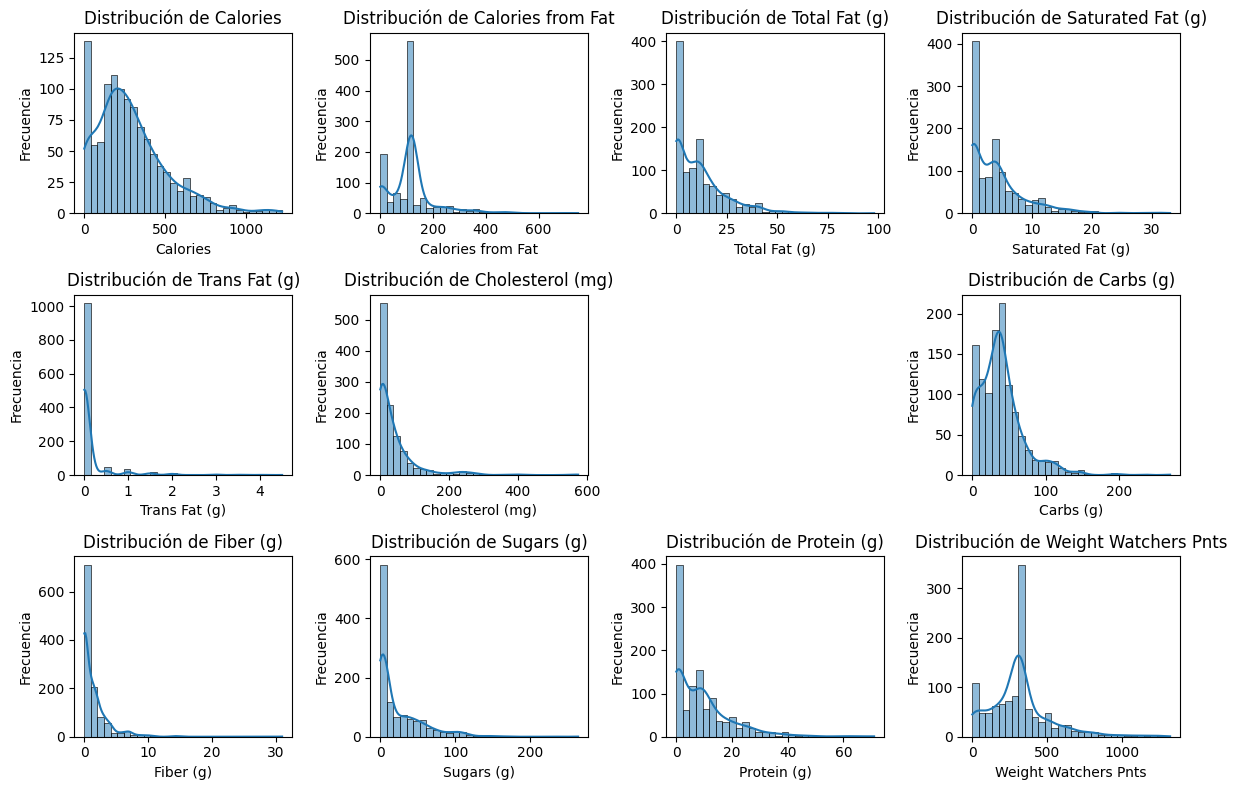

In [1353]:
# Verificar los nombres de las columnas
("Nombres de las columnas originales:")
(data.columns)

# Limpiar los nombres de las columnas (reemplazar saltos de línea y caracteres extraños)
data.columns = data.columns.str.replace('\n', ' ', regex=False).str.strip()

# Verificar los nombres de las columnas después de la limpieza
("\nNombres de las columnas después de la limpieza:")
(data.columns)

# Lista de columnas numéricas para procesar
numeric_columns = ['Calories', 'Calories from Fat', 'Total Fat (g)', 'Saturated Fat (g)', 
                   'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)', 
                   'Fiber (g)', 'Sugars (g)', 'Protein (g)', 'Weight Watchers Pnts']

# Intentar convertir las columnas a valores numéricos, reemplazando los valores que no se pueden convertir por NaN
for col in numeric_columns:
    if col in data.columns:  # Verificar si la columna existe
        data[col] = pd.to_numeric(data[col], errors='coerce')


# Verificar que las conversiones hayan sido correctas (es decir, que las columnas ahora son numéricas)
("\nTipos de datos después de la conversión:")
(data.dtypes)

# Identificación de distribuciones: Histograma y gráfico de densidad
plt.figure(figsize=(12, 8))

# Iterar sobre las columnas numéricas para graficar
for i, column in enumerate(numeric_columns, 1):
    if column in data.columns:  # Verificar si la columna existe antes de graficar
        plt.subplot(3, 4, i)  # Ajuste del tamaño de la subgrilla para 3 filas y 4 columnas
        sns.histplot(data[column].dropna(), kde=True, bins=30)  # Histograma con gráfica de densidad (sin NaN)
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Implementación del Mapa de Calor

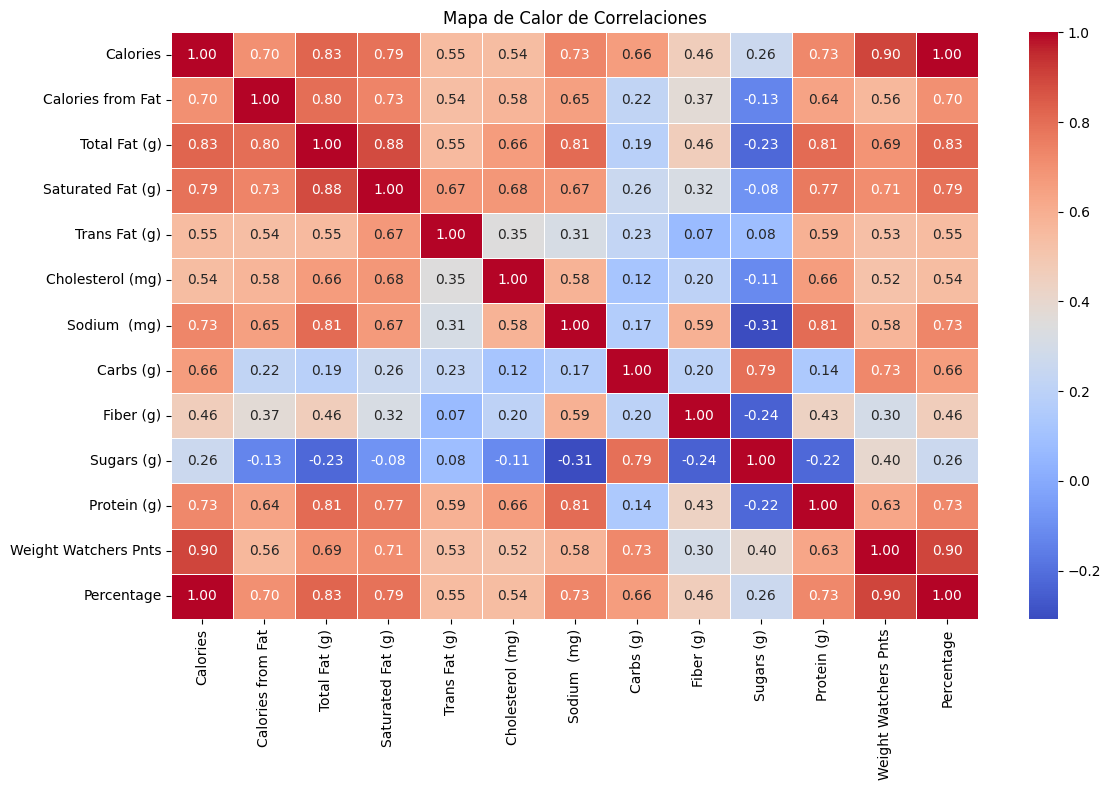

In [1354]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de las columnas numéricas
correlation_matrix = numeric_data.corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Títulos y ajustes
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()


## Analisis exploratorio 

### Identificación de correlaciones y relaciones entre variables

In [1355]:
(data.describe())


,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts,Percentage
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,287.908526,118.033708,11.705690,4.077892,0.140858,40.297513,428.097691,39.024254,1.454291,23.844583,9.430970,311.142693,0.087642
std,221.192640,97.845278,13.562894,4.883174,0.475939,67.496103,494.649150,30.752398,2.306695,32.123198,10.742149,208.844621,0.067333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,70.000000,0.000000,0.000000,0.000000,0.000000,70.000000,18.000000,0.000000,2.000000,0.000000,183.000000,0.042617
50%,250.000000,118.033708,9.000000,3.000000,0.000000,20.000000,190.000000,36.000000,1.000000,8.000000,7.000000,311.142693,0.076103
75%,390.000000,118.033708,17.000000,6.000000,0.000000,50.000000,670.000000,51.000000,2.000000,39.000000,13.000000,368.000000,0.118720
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000,0.371381
